In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph
import pandas as pd 

/home/mye/lang_project/python14-env/lib/python3.14/site-packages/langchain_core/_api/deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [2]:
class AgentState(TypedDict):
    message: str
    name: str
def greeting_node(state: AgentState)->AgentState:
    """Simple node taht adds a greeting message to the state"""
    state["message"]=f"Hey {state["message"]}, how is your day going"
    return state
def compliment(state: AgentState)->AgentState:
     """the agent will say Boby you are doing amezing job learning Langgraph"""
     state["name"] = f"{state['name']}, you're doing an amazing job learning LangGraph"
     return state

In [4]:

graph = StateGraph(AgentState)
graph.add_node("greeter", greeting_node)
graph.add_node("complimenter", compliment)
graph.add_edge("greeter", "complimenter")


graph.set_entry_point("greeter")
graph.set_finish_point("complimenter")
app = graph.compile()

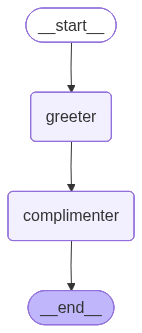

In [5]:

from IPython.display import Image, display
# draw_mermaid_png() likely returns PNG bytes — pass them to Image
display(Image(data=app.get_graph().draw_mermaid_png(), format="png"))

In [7]:
result = app.invoke({"message": "Bob", "name": "Bob"})
result["message"]
result["message"]

'Hey Bob, how is your day going'

In [2]:
print("Hello world")

Hello world


In [ ]:
d